In [1]:
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
G = 100
DT = 0.001
STEP = 100
SCALE = 1.0
MASS_EARTH = 1
SPEED_EARTH = 1
MASS_MOON = 1.0E-2
SPEED_MOON = 2
MASS_SUN = 1
SPEED_SUN = 0

In [3]:
class Body:
    def __init__(self, mass, position = np.zeros(3), momentum = np.zeros(3)):
        self.position = position
        self.momentum = momentum
        self.mass = mass
        self.X = []
        self.Y = []
        
    def update_momentum(self, bodies):
        for body in bodies:
            netforce = np.zeros(3)
            if not body is self:
                direction = self.position - body.position
                netforce = netforce - (G*body.mass*self.mass/np.linalg.norm(direction)*direction) / abs(direction.dot(direction))
            self.momentum = self.momentum + netforce * DT
    
    def update(self):
        self.position = self.position + (self.momentum * DT) / self.mass
        self.X.append(self.position[0])
        self.Y.append(self.position[1])

In [4]:
Bodies = [Body(position=np.array([5,0,0]), momentum=np.array([0,MASS_SUN*SPEED_SUN-MASS_EARTH*SPEED_EARTH-MASS_MOON*SPEED_MOON,0]), mass=MASS_SUN), 
          Body(position=np.array([-5,0,0]), momentum=np.array([0,MASS_EARTH*SPEED_EARTH,0]), mass=MASS_EARTH), 
          Body(position=np.array([30,0,0]), momentum=np.array([0,MASS_MOON*SPEED_MOON,0]), mass=MASS_MOON)]

In [5]:
def update_bodies(steps):
    for _ in range(steps):
        for body in Bodies:
            body.update_momentum(Bodies)
        
        for body in Bodies:
            body.update()

<IPython.core.display.Javascript object>


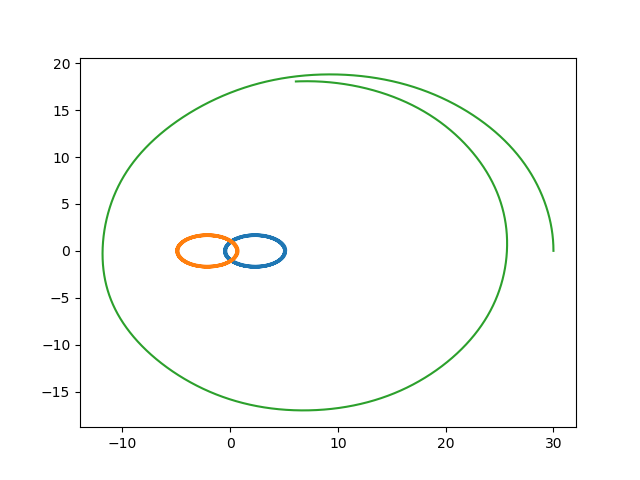

In [6]:
update_bodies(50000)
for body in Bodies:
    plt.plot(body.X, body.Y)

<IPython.core.display.Javascript object>


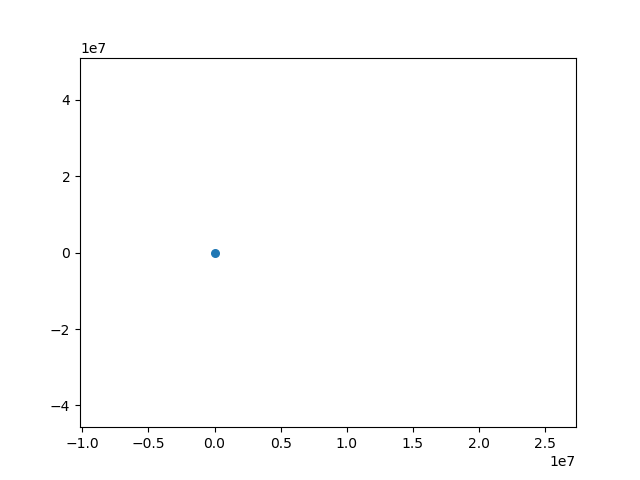

In [6]:
fig, ax = plt.subplots()
ax.set(xlim=(-30, 30), ylim=(-30, 30))
scat = plt.scatter([], [], s=30)
lines = []

for i in range(len(Bodies)):
    line, = ax.plot([], [])
    lines.append(line)

def update_frame(frame):
    X, Y, P = [], [], []
    
    update_bodies(STEP)

    for i, body in enumerate(Bodies):
        lines[i].set_data(body.X, body.Y)
        P.append([body.X[-1], body.Y[-1]])

    scat.set_offsets(tuple(P))
    
    return scat,

ani = FuncAnimation(fig, update_frame, frames=10000, repeat=False, blit=True, interval=1) 
#ani.save("output.gif", writer="pillow")
plt.show()